In [1]:
import keras

Using TensorFlow backend.
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SishilSurendran\Anaconda3\lib\site-packag

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


In [45]:
data=pd.read_csv("C:\\Sishil\\MBA\\Capstone Project\\CategoryDataDec19.csv",encoding='latin1')

In [46]:
data.head()

,Description,Category
0,as002a: 01/01/20 00:50:31 CPA2401 99 Batch job...,Remote Operations/TSSA
1,as075a: AUT9897AS075A 252703/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops
2,as024a: 12/31/19 23:35:32 CPA2401 99 Batch job...,Remote Operations/TSSA
3,as335a: AUT9897AS335A 788253/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops
4,as293b: AUT7001AS293B 054018/Q1WWT/QSMUVALM Mi...,Vendor - IBMi Console Ops


In [47]:
data.Category.value_counts()

Remote Operations/TSSA             12745
Vendor - IBMi Console Ops           8468
Windows Server Infrastructure       4064
IBM - Dynamic Automation            1244
AD Platform                          768
Tech - AIX - pSERIES Support         412
Event Management                     147
ServiceNow Support                   104
Tech - AS400 - IDS Canada             69
Tech - AS400 - iSERIES Support        69
Vendor - IBMi Platform Support        68
Citrix Platform                       29
Tech - AS400 - Sygma Support          18
Middleware Platform                   13
Storage - Infrastructure               9
Vendor - IBMi High Availability        6
Fax Support                            2
IBM - Network Operations               1
Name: Category, dtype: int64

In [48]:
data['Target'] = data.Category.astype('category').cat.codes

In [49]:
data.head()

,Description,Category,Target
0,as002a: 01/01/20 00:50:31 CPA2401 99 Batch job...,Remote Operations/TSSA,7
1,as075a: AUT9897AS075A 252703/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14
2,as024a: 12/31/19 23:35:32 CPA2401 99 Batch job...,Remote Operations/TSSA,7
3,as335a: AUT9897AS335A 788253/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14
4,as293b: AUT7001AS293B 054018/Q1WWT/QSMUVALM Mi...,Vendor - IBMi Console Ops,14


In [50]:
data['Num_words'] = data.Description.apply(lambda x : len(x.split()))

In [51]:
data.head()

,Description,Category,Target,Num_words
0,as002a: 01/01/20 00:50:31 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35
1,as075a: AUT9897AS075A 252703/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15
2,as024a: 12/31/19 23:35:32 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35
3,as335a: AUT9897AS335A 788253/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15
4,as293b: AUT7001AS293B 054018/Q1WWT/QSMUVALM Mi...,Vendor - IBMi Console Ops,14,18


In [52]:
bins=[0,50,75, np.inf]
data['Bins']=pd.cut(data.Num_words, bins=[0,10,30,50,80, np.inf], labels=['0-10', '10-20', '20-30','30-40' ,'>40'])

In [53]:
data.head(20)

,Description,Category,Target,Num_words,Bins
0,as002a: 01/01/20 00:50:31 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35,20-30
1,as075a: AUT9897AS075A 252703/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15,10-20
2,as024a: 12/31/19 23:35:32 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35,20-30
3,as335a: AUT9897AS335A 788253/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15,10-20
4,as293b: AUT7001AS293B 054018/Q1WWT/QSMUVALM Mi...,Vendor - IBMi Console Ops,14,18,10-20
5,as306a: 01/01/20 00:24:27 SYS3761 0 The call t...,Remote Operations/TSSA,7,20,10-20
6,as025a: AUT9897AS025A 909934/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15,10-20
7,as059a: AUT9897AS059A 293439/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15,10-20
8,as075a: 01/01/20 00:20:33 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35,20-30
9,as025a: 01/01/20 00:20:31 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35,20-30


In [54]:
word_distribution = data.groupby('Bins').size().reset_index().rename(columns={0:'counts'})

In [55]:
word_distribution.head()

,Bins,counts
0,0-10,6543
1,10-20,21088
2,20-30,605
3,30-40,0
4,>40,0


Text(0.5, 1.0, 'Word distribution per bin')

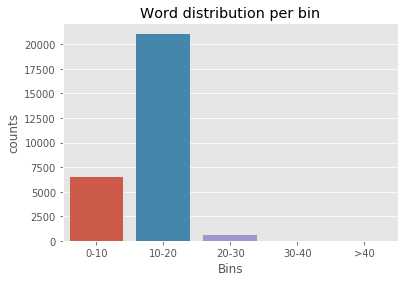

In [57]:
sns.barplot(x='Bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [58]:
data.head()

,Description,Category,Target,Num_words,Bins
0,as002a: 01/01/20 00:50:31 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35,20-30
1,as075a: AUT9897AS075A 252703/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15,10-20
2,as024a: 12/31/19 23:35:32 CPA2401 99 Batch job...,Remote Operations/TSSA,7,35,20-30
3,as335a: AUT9897AS335A 788253/MSSYSOPR/RBBRMS_C...,Vendor - IBMi Console Ops,14,15,10-20
4,as293b: AUT7001AS293B 054018/Q1WWT/QSMUVALM Mi...,Vendor - IBMi Console Ops,14,18,10-20


In [118]:
pd.pivot_table(data,index=['Category'])

,Num_words,Target
Category,,
AD Platform,26.535156,0
Citrix Platform,7.310345,1
Event Management,9.938776,2
Fax Support,9.000000,3
IBM - Dynamic Automation,6.498392,4
IBM - Network Operations,19.000000,5
Middleware Platform,6.000000,6
Remote Operations/TSSA,17.975912,7
ServiceNow Support,8.057692,8


In [59]:
num_class = len(np.unique(data.Category.values))
y = data['Target'].values

In [60]:
#Topic Modelling

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import warnings


In [62]:
import re

In [63]:
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

In [64]:
#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [65]:
type(data['Description'])

pandas.core.series.Series

In [66]:
data_description = data.Description.values

In [67]:
type(data_description)

numpy.ndarray

In [68]:
#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

In [69]:
# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)

In [70]:
tfidf_transformer = TfidfTransformer()

In [71]:
# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

In [72]:
# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

In [73]:
for word, score in word2tfidf.items():
    print(word, score)

0000001191208 10.555241273109566
0000001191211 10.555241273109566
0000011191205 10.555241273109566
0000011191211 10.555241273109566
0000011191212 10.555241273109566
0000011191217 10.555241273109566
0000011191219 10.555241273109566
0000011191222 10.555241273109566
0000011191224 10.555241273109566
0000021191201 10.555241273109566
0000021191202 10.555241273109566
0000021191203 10.555241273109566
0000021191204 10.555241273109566
0000021191205 10.555241273109566
0000021191206 10.555241273109566
0000021191210 10.555241273109566
0000021191211 10.555241273109566
0000021191213 10.555241273109566
0000021191216 10.555241273109566
0000021191218 10.555241273109566
0000021191224 10.555241273109566
0000021191227 10.555241273109566
0000021191231 10.555241273109566
0000021200101 10.555241273109566
0000031191203 10.555241273109566
0000031191204 10.555241273109566
0000031191212 10.555241273109566
0000031191221 10.555241273109566
0000041191203 10.555241273109566
0000041191204 10.555241273109566
0000041191

In [74]:
term_frequency = count_vec.vocabulary_
type(term_frequency)

dict

In [75]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['0000001191208' '357040' '356993' '356944' '356884' '356741' '356694'
 '356627' '356533' '356430']

Features with highest idf:
['1191223223002700' '1191223214039763' '1191223220603598'
 '1191223220712156' '1191223220805449' '1191223220907965'
 '1191223221433632' '1191223221507812' '1191223220108705' 'yonorder']


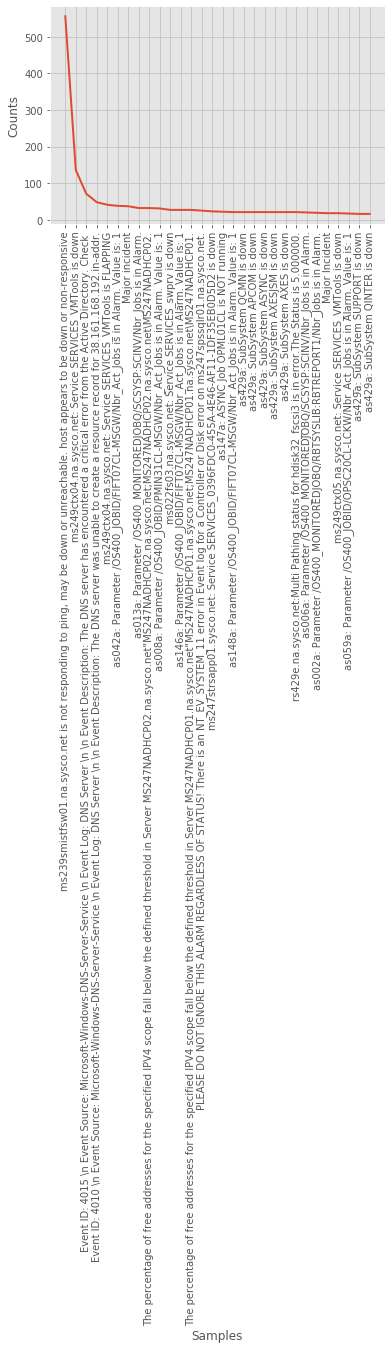

In [76]:
count = nltk.FreqDist(data.Description.values)
count.plot(30)

In [77]:
final_doc = data['Description']
all_documents = tuple(final_doc)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

(28236, 45683)
  (0, 39259)	0.16244558436292234
  (0, 731)	0.2267450936040125
  (0, 20623)	0.12852182645037913
  (0, 0)	0.11501927138272998
  (0, 29868)	0.16653053057457073
  (0, 25941)	0.14170270275614696
  (0, 40173)	0.14143748105769202
  (0, 38754)	0.0975936485852683
  (0, 39728)	0.32160845629747525
  (0, 41729)	0.4018823205901877
  (0, 41042)	0.12615949394673032
  (0, 39741)	0.14095726334716002
  (0, 40573)	0.14773258112244161
  (0, 41622)	0.0767948928764247
  (0, 45291)	0.28704981284013814
  (0, 39231)	0.3227970319080334
  (0, 45161)	0.2091148873803016
  (0, 40780)	0.27037051015464686
  (0, 41106)	0.16262371377236215
  (0, 42756)	0.1628029098313277
  (0, 42979)	0.11438885515089905
  (0, 45570)	0.13702628153262048
  (0, 40956)	0.06669965446060813
  (0, 45314)	0.1267236323774034
  (0, 44130)	0.16131289171125918
  :	:
  (28234, 45112)	0.4532155200551447
  (28234, 40797)	0.16306466663315586
  (28234, 42746)	0.13096915463875944
  (28234, 45226)	0.11780755890932201
  (28234, 42765)	0.11

In [81]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

C:\Users\SishilSurendran\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [82]:

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [79]:
reindexed_data= data["Description"]

data_text = data[['Description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

28236
                                         Description  index
0  as002a: 01/01/20 00:50:31 CPA2401 99 Batch job...      0
1  as075a: AUT9897AS075A 252703/MSSYSOPR/RBBRMS_C...      1
2  as024a: 12/31/19 23:35:32 CPA2401 99 Batch job...      2
3  as335a: AUT9897AS335A 788253/MSSYSOPR/RBBRMS_C...      3
4  as293b: AUT7001AS293B 054018/Q1WWT/QSMUVALM Mi...      4


C:\Users\SishilSurendran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [83]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [85]:
from nltk.stem.porter import *

In [86]:
stemmer = PorterStemmer()
stemmer.stem('identified')

'identifi'

In [88]:
doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['Description'].map(preprocess)
processed_docs[:5]

original document: 
['as306a:', '01/01/20', '00:24:27', 'SYS3761', '0', 'The', 'call', 'to', 'the', 'send', 'program', 'SYDR02RB', 'ended', 'in', 'error', '(C', 'R).', '422179/APCOM/APCOM_RDQL', 'QMHSNUSR', '3929024']


 tokenized and lemmatized document: 
['send', 'program', 'sydr', 'end', 'error', 'apcom', 'apcom_rdql', 'qmhsnusr']


0    [batch, job, detect, apsc, subsystem, batch, j...
1    [mssysopr, rbbrms_chk, daili, save, start, inv...
2    [batch, job, detect, apsc, subsystem, batch, j...
3    [mssysopr, rbbrms_chk, daili, save, start, inv...
4    [qsmuvalm, mimix, issu, statu, inact, object, ...
Name: Description, dtype: object

In [89]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 apsc
1 batch
2 continu
3 detect
4 job
5 necessari
6 proceed
7 respond
8 subsystem
9 wait
10 cqsysopr


In [90]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(14, 2),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1)]

In [91]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 14 ("qsi") appears 2 time.
Word 36 ("condit") appears 1 time.
Word 37 ("exist") appears 1 time.
Word 38 ("help") appears 1 time.
Word 39 ("press") appears 1 time.
Word 40 ("qsysarb") appears 1 time.
Word 41 ("qsysopr") appears 1 time.
Word 42 ("qwcatar") appears 1 time.
Word 43 ("storag") appears 1 time.


In [92]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.4601297876244939),
 (1, 0.45804532143055293),
 (2, 0.08914186748931595),
 (3, 0.20611113354858177),
 (4, 0.54597673102595),
 (5, 0.2325280901343153),
 (6, 0.23284430415271992),
 (7, 0.14915915815233063),
 (8, 0.2536600842500884),
 (9, 0.1872931494794258)]


In [93]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [94]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.071*"sysco" + 0.037*"qsi" + 0.037*"qsysopr" + 0.028*"qrsmhubmon" + 0.026*"miss"'), (1, '0.055*"sysco" + 0.037*"kobjownr" + 0.033*"indic" + 0.033*"disk" + 0.026*"error"'), (2, '0.128*"qsi" + 0.110*"qsysopr" + 0.063*"abnorm" + 0.049*"end" + 0.040*"kobjownr"'), (3, '0.069*"apcom" + 0.056*"continu" + 0.054*"apcom_rdqw" + 0.047*"enter" + 0.047*"abort"'), (4, '0.106*"brmsstrsb" + 0.070*"msjob" + 0.067*"sequenc" + 0.053*"qsi" + 0.046*"end"')]
Topic: 0 
Words: 0.071*"sysco" + 0.037*"qsi" + 0.037*"qsysopr" + 0.028*"qrsmhubmon" + 0.026*"miss" + 0.025*"heartbeat" + 0.022*"host" + 0.021*"servic" + 0.021*"time" + 0.020*"error"
Topic: 1 
Words: 0.055*"sysco" + 0.037*"kobjownr" + 0.033*"indic" + 0.033*"disk" + 0.026*"error" + 0.022*"intern" + 0.021*"qsi" + 0.021*"failur" + 0.020*"statu" + 0.020*"record"
Topic: 2 
Words: 0.128*"qsi" + 0.110*"qsysopr" + 0.063*"abnorm" + 0.049*"end" + 0.040*"kobjownr" + 0.027*"datastor" + 0.027*"rbsr" + 0.021*"activ" + 0.018*"igenalr" + 0.018*"fail"
Topic: 3 
Wo

In [95]:
# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

In [97]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

C:\Users\SishilSurendran\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [98]:
from collections import OrderedDict
data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}

In [99]:
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(98, 5)
(5, 98)


In [100]:
df_lda

,abnorm,abort,acalg,activ,allow,apcom,apcom_rdql,apcom_rdqw,appear,apsc,...,storag,subsystem,sysco,threshold,time,unabl,util,valu,vmware,warn
0,0.000000,0.000000,0.015709,0.000000,0.016888,0.000000,0.000000,0.000000,0.014693,0.000000,...,0.000000,0.000000,0.071024,0.000000,0.020719,0.000000,0.014738,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.054666,0.000000,0.000000,0.015215,0.000000,0.000000,0.000000,0.016993
2,0.062658,0.000000,0.000000,0.020975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017781,0.014674,0.017835,0.015249,0.000000,0.000000,0.000000,0.016520,0.013626,0.000000
3,0.000000,0.046557,0.000000,0.000000,0.000000,0.069041,0.000000,0.054466,0.000000,0.018834,...,0.000000,0.023380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.018182,0.000000,0.000000,0.000000,0.038702,0.011826,0.000000,0.000000,0.000000,...,0.000000,0.019528,0.000000,0.000000,0.000000,0.000000,0.000000,0.010025,0.000000,0.000000


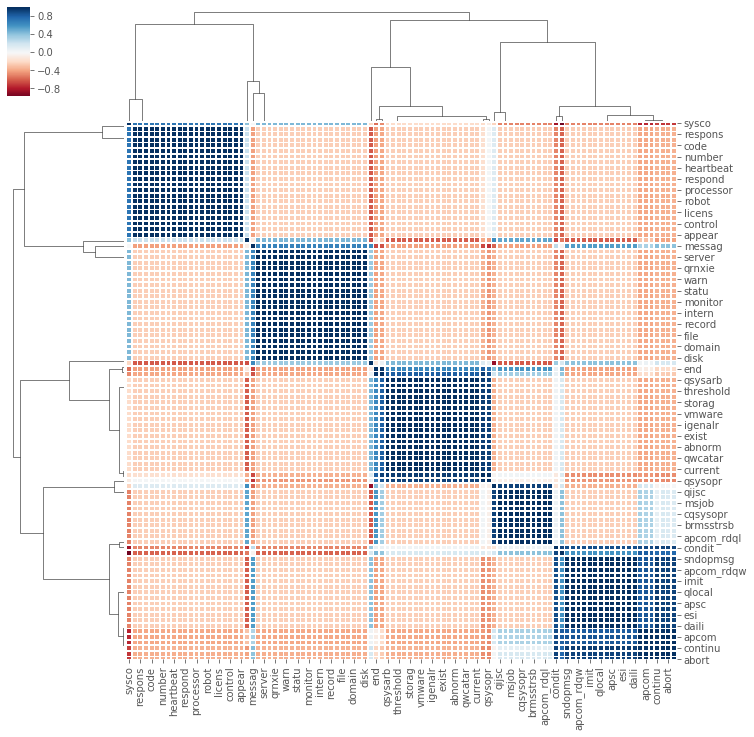

In [101]:
g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [102]:
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Description.values)
post_seq = tokenizer.texts_to_sequences(data.Description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05,random_state=42)

In [104]:
vocab_size = len(tokenizer.word_index) + 1

In [105]:
#Deep Learning Model

In [106]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.ext

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          5846784   
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 18)                594       
Total params: 7,895,410
Trainable params: 7,895,410
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.exten

Train on 20118 samples, validate on 6706 samples
Epoch 1/10
20118/20118 [==============================] - 99s 5ms/step - loss: 0.4489 - acc: 0.8843 - val_loss: 0.2244 - val_acc: 0.9378

Epoch 00001: val_acc improved from -inf to 0.93782, saving model to weights-simple.hdf5
Epoch 2/10
20118/20118 [==============================] - 99s 5ms/step - loss: 0.1440 - acc: 0.9580 - val_loss: 0.1563 - val_acc: 0.9505

Epoch 00002: val_acc improved from 0.93782 to 0.95049, saving model to weights-simple.hdf5
Epoch 3/10
20118/20118 [==============================] - 95s 5ms/step - loss: 0.0900 - acc: 0.9720 - val_loss: 0.1395 - val_acc: 0.9554

Epoch 00003: val_acc improved from 0.95049 to 0.95541, saving model to weights-simple.hdf5
Epoch 4/10
20118/20118 [==============================] - 74s 4ms/step - loss: 0.0579 - acc: 0.9830 - val_loss: 0.1503 - val_acc: 0.9483

Epoch 00004: val_acc did not improve from 0.95541
Epoch 5/10
20118/20118 [==============================] - 75s 4ms/step - loss: 

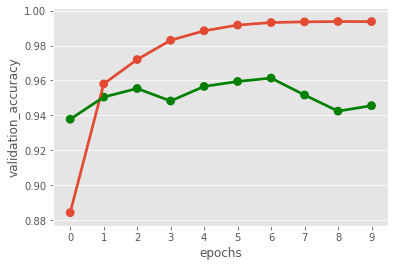

In [107]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [108]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.9475920679886686

In [113]:
from sklearn.metrics import confusion_matrix


In [115]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\SishilSurendran\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [122]:
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

<Figure size 720x720 with 0 Axes>

Confusion Matrix


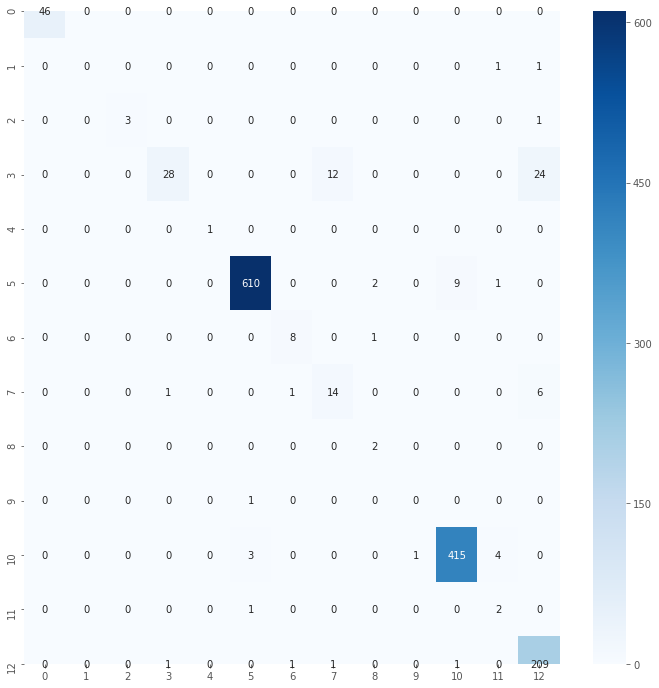

In [121]:
plt.figure(figsize=(12,12))
print('Confusion Matrix')
cnf_matrix = confusion_matrix(y_test, predicted)
#lbl1=["P1","P2"]
#lbl2=["T1","T2"]
#sns.heatmap(cf, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")

plt.show();

In [123]:
#RNN

In [124]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 128)          5846784   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 18)                594       
Total params: 5,898,866
Trainable params: 5,898,866
Non-trainable params: 0
_________________________________________________________________


C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.e

In [125]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=20, callbacks=[checkpointer])

C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:125: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.float_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.extend([np.asscalar(x) for x in proto_values])
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:131: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tensor_proto.int_val.exten

Train on 20118 samples, validate on 6706 samples
Epoch 1/20
20118/20118 [==============================] - 325s 16ms/step - loss: 0.5611 - acc: 0.8640 - val_loss: 0.2066 - val_acc: 0.9402

Epoch 00001: val_acc improved from -inf to 0.94020, saving model to weights.hdf5
Epoch 2/20
20118/20118 [==============================] - 182s 9ms/step - loss: 0.1506 - acc: 0.9565 - val_loss: 0.1634 - val_acc: 0.9502

Epoch 00002: val_acc improved from 0.94020 to 0.95019, saving model to weights.hdf5
Epoch 3/20
20118/20118 [==============================] - 187s 9ms/step - loss: 0.0954 - acc: 0.9715 - val_loss: 0.1523 - val_acc: 0.9538

Epoch 00003: val_acc improved from 0.95019 to 0.95377, saving model to weights.hdf5
Epoch 4/20
20118/20118 [==============================] - 187s 9ms/step - loss: 0.0611 - acc: 0.9821 - val_loss: 0.1988 - val_acc: 0.9415

Epoch 00004: val_acc did not improve from 0.95377
Epoch 5/20
20118/20118 [==============================] - 168s 8ms/step - loss: 0.0459 - acc: 0

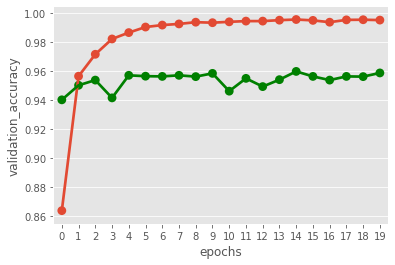

In [126]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [127]:
model_lstm.load_weights('weights.hdf5')
predicted = model_lstm.predict(X_test)

In [128]:
predicted

array([[8.5430751e-10, 1.6488823e-10, 4.3363009e-15, ..., 9.9105341e-07,
        5.0697404e-06, 3.8884204e-12],
       [1.9040736e-11, 8.8313745e-11, 8.3046403e-10, ..., 1.8718126e-06,
        1.6373968e-06, 6.2410049e-10],
       [7.5444123e-10, 9.6313700e-11, 5.2404709e-15, ..., 2.2169327e-06,
        9.6056283e-06, 4.3418836e-12],
       ...,
       [4.8702131e-09, 9.8520820e-07, 6.4816946e-10, ..., 3.5493528e-10,
        5.5270677e-10, 9.9999332e-01],
       [2.2540695e-11, 1.8685939e-10, 4.5981920e-09, ..., 1.3893564e-06,
        1.0941843e-06, 2.2934057e-09],
       [3.6604017e-10, 5.3873041e-11, 1.7221024e-15, ..., 5.7151823e-07,
        2.5729792e-06, 1.2187539e-12]], dtype=float32)

In [129]:
predicted = np.argmax(predicted, axis=1)

In [131]:
accuracy_score(y_test, predicted)

0.9575070821529745

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.00      0.00      0.00         2
           2       1.00      0.50      0.67         4
           4       0.86      0.78      0.82        64
           6       1.00      1.00      1.00         1
           7       0.99      0.98      0.98       622
           8       0.64      1.00      0.78         9
          10       0.79      0.50      0.61        22
          11       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         1
          14       0.98      0.99      0.98       423
          16       1.00      0.33      0.50         3
          17       0.90      0.95      0.92       213

   micro avg       0.96      0.96      0.96      1412
   macro avg       0.78      0.66      0.69      1412
weighted avg       0.96      0.96      0.96      1412



C:\Users\SishilSurendran\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
C:\Users\SishilSurendran\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools

In [135]:
 #This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

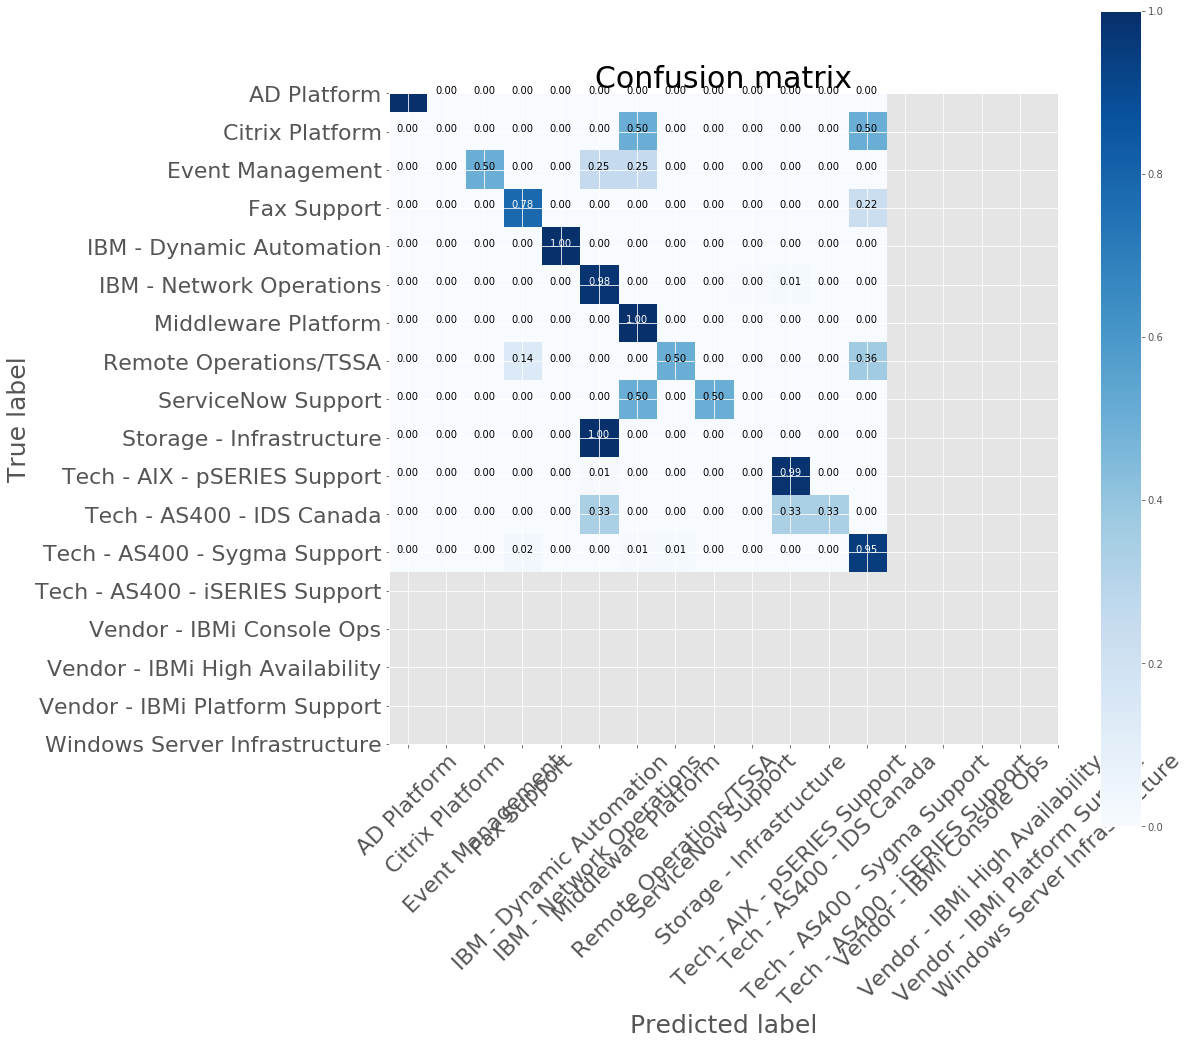

In [137]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(data.Category.values)
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [138]:
from sklearn.externals import joblib

In [139]:
joblib.dump(model_lstm,'model.pkl')

['model.pkl']